# 1. Import and Install Dependencies

In [42]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [73]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [74]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [75]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [76]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [77]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [78]:
draw_styled_landmarks(frame, results)

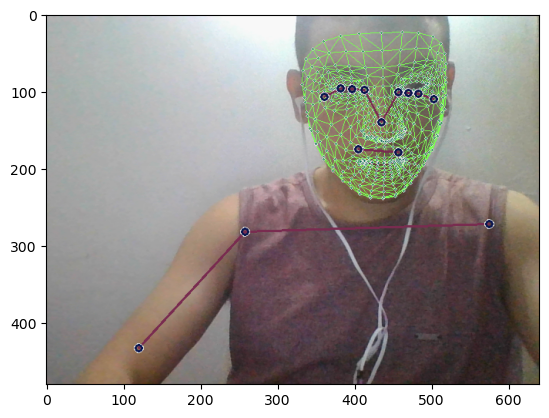

In [79]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [80]:
len(results.right_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [81]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [82]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [83]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


IndentationError: unexpected indent (1373052555.py, line 2)

In [84]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [85]:
result_test = extract_keypoints(results)

In [86]:
result_test

array([ 0.67980218,  0.29262653, -0.85386688, ...,  0.        ,
        0.        ,  0.        ])

In [87]:
np.save('1', result_test)

In [17]:
np.load('1.npy')

array([ 0.62431496,  0.57161874, -1.27240694, ...,  0.62556851,
        0.27269471, -0.01691542])

# 4. Setup Folders for Collection

In [88]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['oi', 'obrigado', 'casa'])

#quantidade de videos
no_sequences = 30

# quantidade de frames de cada video
sequence_length = 30

In [89]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [90]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [158]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [91]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [92]:
label_map = {label:num for num, label in enumerate(actions)}

In [93]:
label_map

{'oi': 0, 'obrigado': 1, 'casa': 2}

In [94]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [95]:
np.array(sequences).shape

(90, 30, 1662)

In [96]:
np.array(labels).shape

(90,)

In [101]:
X = np.array(sequences)

In [102]:
X.shape

(90, 30, 1662)

In [103]:
y = to_categorical(labels).astype(int)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [105]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

# 7. Build and Train LSTM Neural Network

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [107]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [108]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [109]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [110]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
3/3 [==============================] - 6s 256ms/step - loss: 1.7775 - categorical_accuracy: 0.3056
Epoch 2/1000
3/3 [==============================] - 1s 279ms/step - loss: 10.2481 - categorical_accuracy: 0.4306
Epoch 3/1000
3/3 [==============================] - 1s 284ms/step - loss: 3.1547 - categorical_accuracy: 0.3333
Epoch 4/1000
3/3 [==============================] - 1s 282ms/step - loss: 3.1615 - categorical_accuracy: 0.5556
Epoch 5/1000
3/3 [==============================] - 1s 274ms/step - loss: 5.0476 - categorical_accuracy: 0.3611
Epoch 6/1000
3/3 [==============================] - 1s 281ms/step - loss: 7.3237 - categorical_accuracy: 0.1806
Epoch 7/1000
3/3 [==============================] - 1s 268ms/step - loss: 10.1496 - categorical_accuracy: 0.3056
Epoch 8/1000
3/3 [==============================] - 1s 272ms/step - loss: 12.4779 - categorical_accuracy: 0.1806
Epoch 9/1000
3/3 [==============================] - 1s 286ms/step - loss: 6.8136 - categorical_accura

3/3 [==============================] - 1s 347ms/step - loss: 0.7555 - categorical_accuracy: 0.7083
Epoch 74/1000
3/3 [==============================] - 1s 336ms/step - loss: 0.7672 - categorical_accuracy: 0.6667
Epoch 75/1000
3/3 [==============================] - 1s 307ms/step - loss: 0.6931 - categorical_accuracy: 0.6806
Epoch 76/1000
3/3 [==============================] - 1s 323ms/step - loss: 0.6774 - categorical_accuracy: 0.6667
Epoch 77/1000
3/3 [==============================] - 1s 304ms/step - loss: 0.6464 - categorical_accuracy: 0.7083
Epoch 78/1000
3/3 [==============================] - 1s 327ms/step - loss: 0.8752 - categorical_accuracy: 0.5417
Epoch 79/1000
3/3 [==============================] - 1s 343ms/step - loss: 0.7888 - categorical_accuracy: 0.6667
Epoch 80/1000
3/3 [==============================] - 1s 340ms/step - loss: 0.7204 - categorical_accuracy: 0.6667
Epoch 81/1000
3/3 [==============================] - 1s 312ms/step - loss: 0.7705 - categorical_accuracy: 0.69

3/3 [==============================] - 1s 282ms/step - loss: 0.5221 - categorical_accuracy: 0.7639
Epoch 146/1000
3/3 [==============================] - 1s 305ms/step - loss: 0.5336 - categorical_accuracy: 0.7361
Epoch 147/1000
3/3 [==============================] - 1s 309ms/step - loss: 0.5772 - categorical_accuracy: 0.7639
Epoch 148/1000
3/3 [==============================] - 1s 268ms/step - loss: 0.4984 - categorical_accuracy: 0.8194
Epoch 149/1000
3/3 [==============================] - 1s 309ms/step - loss: 0.5066 - categorical_accuracy: 0.8472
Epoch 150/1000
3/3 [==============================] - 1s 283ms/step - loss: 0.5261 - categorical_accuracy: 0.7639
Epoch 151/1000
3/3 [==============================] - 1s 276ms/step - loss: 0.4545 - categorical_accuracy: 0.8333
Epoch 152/1000
3/3 [==============================] - 1s 355ms/step - loss: 0.5052 - categorical_accuracy: 0.7639
Epoch 153/1000
3/3 [==============================] - 1s 320ms/step - loss: 0.5609 - categorical_accura

Epoch 217/1000
3/3 [==============================] - 1s 319ms/step - loss: 0.4177 - categorical_accuracy: 0.8333
Epoch 218/1000
3/3 [==============================] - 1s 305ms/step - loss: 0.4214 - categorical_accuracy: 0.8333
Epoch 219/1000
3/3 [==============================] - 1s 348ms/step - loss: 0.5704 - categorical_accuracy: 0.7500
Epoch 220/1000
3/3 [==============================] - 1s 342ms/step - loss: 0.3843 - categorical_accuracy: 0.8194
Epoch 221/1000
3/3 [==============================] - 1s 315ms/step - loss: 0.4920 - categorical_accuracy: 0.7778
Epoch 222/1000
3/3 [==============================] - 1s 354ms/step - loss: 0.4646 - categorical_accuracy: 0.8194
Epoch 223/1000
3/3 [==============================] - 1s 360ms/step - loss: 0.4232 - categorical_accuracy: 0.8056
Epoch 224/1000
3/3 [==============================] - 1s 321ms/step - loss: 0.4185 - categorical_accuracy: 0.8056
Epoch 225/1000
3/3 [==============================] - 1s 302ms/step - loss: 0.4640 - cat

3/3 [==============================] - 1s 298ms/step - loss: 1.3006 - categorical_accuracy: 0.5972
Epoch 289/1000
3/3 [==============================] - 1s 316ms/step - loss: 1.2238 - categorical_accuracy: 0.5417
Epoch 290/1000
3/3 [==============================] - 1s 300ms/step - loss: 1.1036 - categorical_accuracy: 0.5417
Epoch 291/1000
3/3 [==============================] - 1s 326ms/step - loss: 1.0767 - categorical_accuracy: 0.5694
Epoch 292/1000
3/3 [==============================] - 1s 303ms/step - loss: 0.8469 - categorical_accuracy: 0.5972
Epoch 293/1000
3/3 [==============================] - 1s 290ms/step - loss: 1.0877 - categorical_accuracy: 0.5417
Epoch 294/1000
3/3 [==============================] - 1s 277ms/step - loss: 0.6768 - categorical_accuracy: 0.7083
Epoch 295/1000
3/3 [==============================] - 1s 298ms/step - loss: 0.9225 - categorical_accuracy: 0.6389
Epoch 296/1000
3/3 [==============================] - 1s 325ms/step - loss: 0.7357 - categorical_accura

Epoch 360/1000
3/3 [==============================] - 1s 321ms/step - loss: 0.8905 - categorical_accuracy: 0.7083
Epoch 361/1000
3/3 [==============================] - 1s 309ms/step - loss: 0.7521 - categorical_accuracy: 0.6806
Epoch 362/1000
3/3 [==============================] - 1s 319ms/step - loss: 1.4131 - categorical_accuracy: 0.7222
Epoch 363/1000
3/3 [==============================] - 1s 324ms/step - loss: 0.7022 - categorical_accuracy: 0.6944
Epoch 364/1000
3/3 [==============================] - 1s 341ms/step - loss: 1.1325 - categorical_accuracy: 0.5556
Epoch 365/1000
3/3 [==============================] - 1s 351ms/step - loss: 0.7795 - categorical_accuracy: 0.7222
Epoch 366/1000
3/3 [==============================] - 1s 343ms/step - loss: 0.9026 - categorical_accuracy: 0.6111
Epoch 367/1000
3/3 [==============================] - 1s 346ms/step - loss: 0.7402 - categorical_accuracy: 0.6667
Epoch 368/1000
3/3 [==============================] - 1s 309ms/step - loss: 0.5832 - cat

3/3 [==============================] - 1s 336ms/step - loss: 0.2776 - categorical_accuracy: 0.8889
Epoch 432/1000
3/3 [==============================] - 1s 301ms/step - loss: 0.3421 - categorical_accuracy: 0.8472
Epoch 433/1000
3/3 [==============================] - 1s 323ms/step - loss: 0.2644 - categorical_accuracy: 0.9028
Epoch 434/1000
3/3 [==============================] - 1s 343ms/step - loss: 0.2728 - categorical_accuracy: 0.9028
Epoch 435/1000
3/3 [==============================] - 1s 304ms/step - loss: 0.2649 - categorical_accuracy: 0.8750
Epoch 436/1000
3/3 [==============================] - 1s 344ms/step - loss: 0.2581 - categorical_accuracy: 0.8889
Epoch 437/1000
3/3 [==============================] - 1s 335ms/step - loss: 0.2975 - categorical_accuracy: 0.8611
Epoch 438/1000
3/3 [==============================] - 1s 319ms/step - loss: 0.2942 - categorical_accuracy: 0.8472
Epoch 439/1000
3/3 [==============================] - 1s 341ms/step - loss: 0.2814 - categorical_accura

Epoch 503/1000
3/3 [==============================] - 1s 322ms/step - loss: 0.1755 - categorical_accuracy: 0.9444
Epoch 504/1000
3/3 [==============================] - 1s 334ms/step - loss: 0.1502 - categorical_accuracy: 0.9028
Epoch 505/1000
3/3 [==============================] - 1s 287ms/step - loss: 0.1445 - categorical_accuracy: 0.9583
Epoch 506/1000
3/3 [==============================] - 1s 357ms/step - loss: 0.1587 - categorical_accuracy: 0.9583
Epoch 507/1000
3/3 [==============================] - 1s 342ms/step - loss: 0.1336 - categorical_accuracy: 0.9583
Epoch 508/1000
3/3 [==============================] - 1s 309ms/step - loss: 0.1498 - categorical_accuracy: 0.8889
Epoch 509/1000
3/3 [==============================] - 1s 335ms/step - loss: 0.1228 - categorical_accuracy: 0.9861
Epoch 510/1000
3/3 [==============================] - 1s 353ms/step - loss: 0.1317 - categorical_accuracy: 0.9861
Epoch 511/1000
3/3 [==============================] - 1s 329ms/step - loss: 0.1126 - cat

3/3 [==============================] - 1s 314ms/step - loss: 0.1041 - categorical_accuracy: 0.9861
Epoch 575/1000
3/3 [==============================] - 1s 317ms/step - loss: 0.1502 - categorical_accuracy: 0.9444
Epoch 576/1000
3/3 [==============================] - 1s 333ms/step - loss: 0.1520 - categorical_accuracy: 0.9306
Epoch 577/1000
3/3 [==============================] - 1s 306ms/step - loss: 0.3354 - categorical_accuracy: 0.9306
Epoch 578/1000
3/3 [==============================] - 1s 318ms/step - loss: 0.2059 - categorical_accuracy: 0.9306
Epoch 579/1000
3/3 [==============================] - 1s 308ms/step - loss: 0.0714 - categorical_accuracy: 0.9722
Epoch 580/1000
3/3 [==============================] - 1s 323ms/step - loss: 0.1070 - categorical_accuracy: 0.9722
Epoch 581/1000
3/3 [==============================] - 1s 351ms/step - loss: 0.1195 - categorical_accuracy: 0.9583
Epoch 582/1000
3/3 [==============================] - 1s 305ms/step - loss: 0.0669 - categorical_accura

Epoch 646/1000
3/3 [==============================] - 1s 320ms/step - loss: 0.0252 - categorical_accuracy: 1.0000
Epoch 647/1000
3/3 [==============================] - 1s 311ms/step - loss: 0.0276 - categorical_accuracy: 1.0000
Epoch 648/1000
3/3 [==============================] - 1s 337ms/step - loss: 0.0262 - categorical_accuracy: 1.0000
Epoch 649/1000
3/3 [==============================] - 1s 305ms/step - loss: 0.0242 - categorical_accuracy: 1.0000
Epoch 650/1000
3/3 [==============================] - 1s 339ms/step - loss: 0.0209 - categorical_accuracy: 1.0000
Epoch 651/1000
3/3 [==============================] - 1s 318ms/step - loss: 0.0225 - categorical_accuracy: 1.0000
Epoch 652/1000
3/3 [==============================] - 1s 314ms/step - loss: 0.0222 - categorical_accuracy: 0.9861
Epoch 653/1000
3/3 [==============================] - 1s 322ms/step - loss: 0.0347 - categorical_accuracy: 0.9861
Epoch 654/1000
3/3 [==============================] - 1s 307ms/step - loss: 0.0218 - cat

3/3 [==============================] - 1s 354ms/step - loss: 0.0915 - categorical_accuracy: 0.9583
Epoch 718/1000
3/3 [==============================] - 1s 301ms/step - loss: 0.0750 - categorical_accuracy: 0.9444
Epoch 719/1000
3/3 [==============================] - 1s 320ms/step - loss: 0.0677 - categorical_accuracy: 0.9722
Epoch 720/1000
3/3 [==============================] - 1s 331ms/step - loss: 0.0718 - categorical_accuracy: 0.9583
Epoch 721/1000
3/3 [==============================] - 1s 343ms/step - loss: 0.1436 - categorical_accuracy: 0.9583
Epoch 722/1000
3/3 [==============================] - 1s 328ms/step - loss: 3.6743 - categorical_accuracy: 0.5278
Epoch 723/1000
3/3 [==============================] - 1s 319ms/step - loss: 2.1575 - categorical_accuracy: 0.6250
Epoch 724/1000
3/3 [==============================] - 1s 328ms/step - loss: 1.8943 - categorical_accuracy: 0.6250
Epoch 725/1000
3/3 [==============================] - 1s 321ms/step - loss: 0.9103 - categorical_accura

Epoch 789/1000
3/3 [==============================] - 1s 319ms/step - loss: 0.0221 - categorical_accuracy: 1.0000
Epoch 790/1000
3/3 [==============================] - 1s 310ms/step - loss: 0.0287 - categorical_accuracy: 0.9861
Epoch 791/1000
3/3 [==============================] - 1s 316ms/step - loss: 0.0192 - categorical_accuracy: 1.0000
Epoch 792/1000
3/3 [==============================] - 1s 331ms/step - loss: 0.0190 - categorical_accuracy: 1.0000
Epoch 793/1000
3/3 [==============================] - 1s 312ms/step - loss: 0.0171 - categorical_accuracy: 1.0000
Epoch 794/1000
3/3 [==============================] - 1s 327ms/step - loss: 0.0190 - categorical_accuracy: 1.0000
Epoch 795/1000
3/3 [==============================] - 1s 315ms/step - loss: 0.0194 - categorical_accuracy: 1.0000
Epoch 796/1000
3/3 [==============================] - 1s 302ms/step - loss: 0.0361 - categorical_accuracy: 0.9722
Epoch 797/1000
3/3 [==============================] - 1s 330ms/step - loss: 0.1275 - cat

3/3 [==============================] - 1s 315ms/step - loss: 0.0145 - categorical_accuracy: 1.0000
Epoch 861/1000
3/3 [==============================] - 1s 311ms/step - loss: 0.0115 - categorical_accuracy: 1.0000
Epoch 862/1000
3/3 [==============================] - 1s 337ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 863/1000
3/3 [==============================] - 1s 312ms/step - loss: 0.0097 - categorical_accuracy: 1.0000
Epoch 864/1000
3/3 [==============================] - 1s 320ms/step - loss: 0.0055 - categorical_accuracy: 1.0000
Epoch 865/1000
3/3 [==============================] - 1s 324ms/step - loss: 0.0083 - categorical_accuracy: 1.0000
Epoch 866/1000
3/3 [==============================] - 1s 337ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 867/1000
3/3 [==============================] - 1s 290ms/step - loss: 0.0085 - categorical_accuracy: 1.0000
Epoch 868/1000
3/3 [==============================] - 1s 336ms/step - loss: 0.0042 - categorical_accura

Epoch 932/1000
3/3 [==============================] - 1s 285ms/step - loss: 0.1164 - categorical_accuracy: 0.9722
Epoch 933/1000
3/3 [==============================] - 1s 348ms/step - loss: 0.3017 - categorical_accuracy: 0.8750
Epoch 934/1000
3/3 [==============================] - 1s 342ms/step - loss: 0.2794 - categorical_accuracy: 0.9028
Epoch 935/1000
3/3 [==============================] - 1s 302ms/step - loss: 0.1798 - categorical_accuracy: 0.9028
Epoch 936/1000
3/3 [==============================] - 1s 322ms/step - loss: 0.1296 - categorical_accuracy: 0.9583
Epoch 937/1000
3/3 [==============================] - 1s 328ms/step - loss: 0.1278 - categorical_accuracy: 0.9583
Epoch 938/1000
3/3 [==============================] - 1s 328ms/step - loss: 0.0795 - categorical_accuracy: 0.9583
Epoch 939/1000
3/3 [==============================] - 1s 333ms/step - loss: 0.0679 - categorical_accuracy: 0.9722
Epoch 940/1000
3/3 [==============================] - 1s 314ms/step - loss: 0.0487 - cat

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

# 8. Make Predictions

In [111]:
res = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [117]:
actions[np.argmax(res[0])]

'oi'

In [113]:
actions[np.argmax(y_test[4])]

'oi'

# 9. Save Weights

In [118]:
model.save('my_model.keras')

In [38]:
del model

In [119]:
model.load_weights('my_model.keras')

# 10. Evaluation using Confusion Matrix and Accuracy

In [120]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [121]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 221ms/step


In [122]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [123]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[10,  0],
        [ 0,  8]],

       [[12,  1],
        [ 1,  4]],

       [[12,  1],
        [ 1,  4]]], dtype=int64)

In [130]:
accuracy_score(ytrue, yhat)

0.8888888888888888

# 11. Test in Real Time

In [125]:
from scipy import stats

In [126]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [127]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [129]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 21ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_base.Solu

1/1 [==============================] - 0s 32ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 11ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
casa
<class 'mediapipe.python.solution_base.Soluti

1/1 [==============================] - 0s 31ms/step
obrigado
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
obrigado
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
obrigado
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
obrigado
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
obrigado
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
obrigado
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
obrigado
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
obrigado
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
obri

1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
casa
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 30ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
oi
<class 'mediapipe.python.solution_base.Solu

1/1 [==============================] - 0s 31ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 37ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
oi
<class 'mediapipe.python.solution_b

1/1 [==============================] - 0s 35ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_base.

1/1 [==============================] - 0s 32ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
casa
<class 'mediapipe.python.solution

1/1 [==============================] - 0s 30ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
obrigado
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
obrigado
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
obrigado
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
obrigado
<class 'mediapi

1/1 [==============================] - 0s 32ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
casa
<class 'mediapipe.python.solution

1/1 [==============================] - 0s 25ms/step
obrigado
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
obrigado
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
obrigado
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
obrigado
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
oi
<class 'mediapipe.pyt

1/1 [==============================] - 0s 31ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOu

1/1 [==============================] - 0s 32ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
casa
<class 'mediapipe.python.solution

1/1 [==============================] - 0s 16ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_bas

1/1 [==============================] - 0s 27ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
casa
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 31ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
oi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
casa
<class 'mediapipe.python.solution_base.Soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
casa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==========================